In [3337]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import LocalOutlierFactor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import warnings

In [3339]:
df = pd.read_csv("/Users/sinemsen/Downloads/Dataset.csv")

In [3340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   COMMUNITY AREA NAME                  67051 non-null  object 
 1   CENSUS BLOCK                         66974 non-null  float64
 2   BUILDING TYPE                        66974 non-null  object 
 3   BUILDING_SUBTYPE                     66974 non-null  object 
 4   KWH JANUARY 2010                     66180 non-null  float64
 5   KWH FEBRUARY 2010                    66180 non-null  float64
 6   KWH MARCH 2010                       66180 non-null  float64
 7   KWH APRIL 2010                       66180 non-null  float64
 8   KWH MAY 2010                         66180 non-null  float64
 9   KWH JUNE 2010                        66180 non-null  float64
 10  KWH JULY 2010                        66180 non-null  float64
 11  KWH AUGUST 2010             

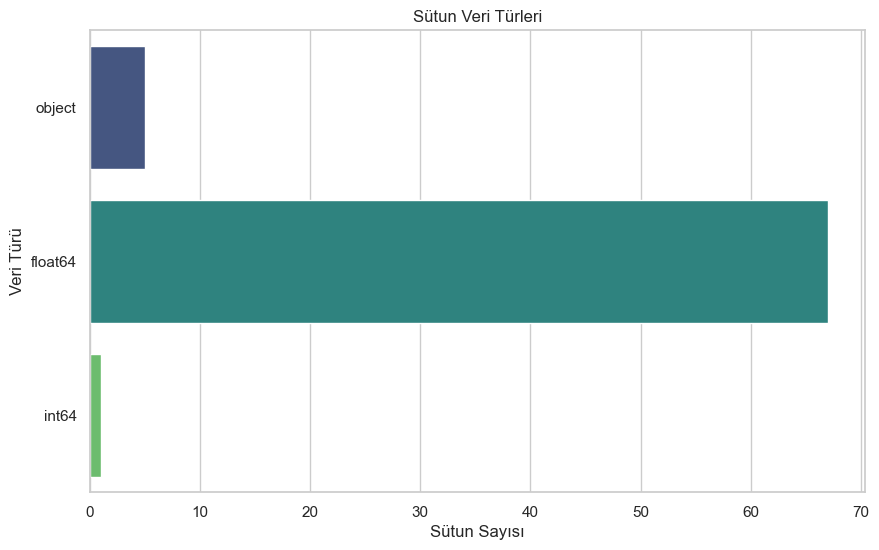

In [3341]:
import seaborn as sns

# Sütun veri tiplerini al
column_types = df.dtypes

# Sütun veri tiplerini kategorik hale getir
column_types = column_types.astype(str)

# Grafik oluşturma
plt.figure(figsize=(10, 6))
sns.countplot(y=column_types, palette='viridis')
plt.title('Sütun Veri Türleri')
plt.xlabel('Sütun Sayısı')
plt.ylabel('Veri Türü')
plt.show()


In [3342]:
df.tail()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
67046,Woodlawn,1.703184e+14,Residential,Single Family,2705.0,1318.0,1582.0,1465.0,1494.0,2990.0,...,116.0,55.0,1.00,0.00,3.14,37.0,0.6727,26.0,0.7030,37.0
67047,Woodlawn,1.703184e+14,Commercial,Multi < 7,1005.0,1760.0,1521.0,1832.0,2272.0,2361.0,...,31.0,24.0,3.00,104.50,2.07,15.0,0.6250,13.0,0.8670,15.0
67048,Woodlawn,1.703184e+14,Residential,Multi < 7,3567.0,3031.0,2582.0,2295.0,7902.0,4987.0,...,31.0,24.0,2.33,100.67,2.07,15.0,0.6250,13.0,0.8670,15.0
67049,Woodlawn,1.703184e+14,Residential,Single Family,1208.0,1055.0,1008.0,1109.0,1591.0,1367.0,...,0.0,0.0,1.00,0.00,0.00,0.0,NaN,0.0,NaN,0.0
67050,Woodlawn,1.703184e+14,Residential,Multi < 7,2717.0,3057.0,2695.0,3793.0,4237.0,5383.0,...,77.0,49.0,2.00,79.40,2.57,30.0,0.6122,28.0,0.9329,30.0


In [3343]:
df.shape 

(67051, 73)

In [3344]:
print(df.columns.tolist())

['COMMUNITY AREA NAME', 'CENSUS BLOCK', 'BUILDING TYPE', 'BUILDING_SUBTYPE', 'KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010', 'TOTAL KWH', 'ELECTRICITY ACCOUNTS', 'ZERO KWH ACCOUNTS', 'THERM JANUARY 2010', 'THERM FEBRUARY 2010', 'THERM MARCH 2010', 'TERM APRIL 2010', 'THERM MAY 2010', 'THERM JUNE 2010', 'THERM JULY 2010', 'THERM AUGUST 2010', 'THERM SEPTEMBER 2010', 'THERM OCTOBER 2010', 'THERM NOVEMBER 2010', 'THERM DECEMBER 2010', 'TOTAL THERMS', 'GAS ACCOUNTS', 'KWH TOTAL SQFT', 'THERMS TOTAL SQFT', 'KWH MEAN 2010', 'KWH STANDARD DEVIATION 2010', 'KWH MINIMUM 2010', 'KWH 1ST QUARTILE 2010', 'KWH 2ND QUARTILE 2010', 'KWH 3RD QUARTILE 2010', 'KWH MAXIMUM 2010', 'KWH SQFT MEAN 2010', 'KWH SQFT STANDARD DEVIATION 2010', 'KWH SQFT MINIMUM 2010', 'KWH SQFT 1ST QUARTILE 2010', 'KWH SQFT 2ND QUARTILE 2010', 'KWH 

In [3345]:
# Sayısal sütunların temel istatistikleri
df.describe()

,CENSUS BLOCK,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,KWH JULY 2010,KWH AUGUST 2010,KWH SEPTEMBER 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
count,6.697400e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,6.618000e+04,...,67037.000000,67037.000000,67051.000000,67051.000000,67037.000000,67037.000000,64606.000000,67037.000000,64433.000000,67037.000000
mean,1.703140e+14,1.758159e+04,1.737651e+04,1.624212e+04,1.595696e+04,1.906623e+04,2.300485e+04,2.482891e+04,2.267526e+04,1.856410e+04,...,105.180169,48.375897,1.887592,71.593006,3.454721,42.347495,0.880365,25.438952,0.511679,42.347495
std,2.776392e+09,3.482508e+05,3.351910e+05,3.164713e+05,3.118232e+05,3.634429e+05,3.988582e+05,4.135955e+05,3.940989e+05,3.486212e+05,...,801.339175,426.941305,1.957215,34.168384,26.146208,371.024953,0.130937,251.193571,0.288431,371.024953
min,1.703101e+14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.703116e+14,1.370000e+03,1.613000e+03,1.586000e+03,1.579000e+03,1.957000e+03,2.700000e+03,3.203000e+03,2.837750e+03,2.027000e+03,...,37.000000,15.000000,1.140000,53.000000,2.150000,13.000000,0.833200,3.000000,0.286000,13.000000
50%,1.703133e+14,3.481500e+03,3.814000e+03,3.681500e+03,3.646000e+03,4.528000e+03,6.295000e+03,7.389000e+03,6.413500e+03,4.573000e+03,...,64.000000,25.000000,1.750000,80.000000,2.700000,22.000000,0.914600,11.000000,0.537900,22.000000
75%,1.703167e+14,7.157000e+03,7.410250e+03,7.059000e+03,7.010000e+03,8.943500e+03,1.282850e+04,1.465750e+04,1.229800e+04,8.634000e+03,...,105.000000,42.000000,2.000000,96.500000,3.320000,37.000000,0.967700,23.000000,0.733000,37.000000
max,1.703198e+14,5.298534e+07,4.787976e+07,4.413646e+07,4.222055e+07,4.861925e+07,5.256908e+07,5.513983e+07,5.158912e+07,4.450386e+07,...,67388.000000,51372.000000,110.000000,158.000000,2061.920000,43222.000000,1.000000,28335.000000,1.000000,43222.000000


In [3346]:
df['BUILDING TYPE'].unique()

array(['Residential', 'Commercial', 'Industrial', nan], dtype=object)

In [3347]:
building_type_counts= df["BUILDING TYPE"].value_counts()
building_type_counts

BUILDING TYPE
Residential    49747
Commercial     17185
Industrial        42
Name: count, dtype: int64

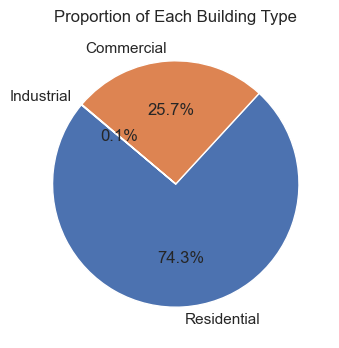

In [3348]:
plt.figure(figsize=(4, 4))
plt.pie(building_type_counts, labels=building_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Building Type')
plt.show()

In [3349]:
df['BUILDING_SUBTYPE'].unique()

array(['Multi < 7', 'Multi 7+', 'Commercial', 'Single Family',
       'Municipal', 'Industrial', nan], dtype=object)

In [3350]:
df['BUILDING_SUBTYPE'].value_counts()

BUILDING_SUBTYPE
Multi < 7        27284
Single Family    26366
Commercial        7775
Multi 7+          5225
Municipal          282
Industrial          42
Name: count, dtype: int64

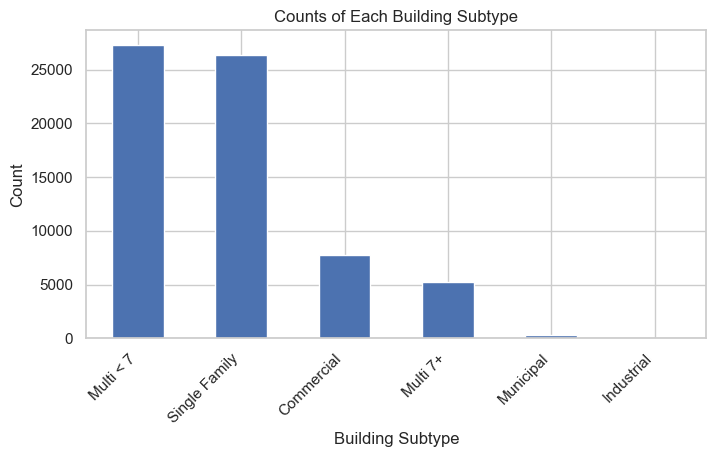

In [3351]:

#plotting counts of each building subtypes.
plt.figure(figsize=(8, 4))
df['BUILDING_SUBTYPE'].value_counts().plot(kind='bar')
plt.title('Counts of Each Building Subtype')
plt.xlabel('Building Subtype')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [3352]:

building_type_subtypes = df.groupby('BUILDING TYPE')['BUILDING_SUBTYPE'].value_counts()

for building_type in building_type_subtypes.index.levels[0]:
    sorted_subtypes = building_type_subtypes[building_type].sort_values
    print(f"{building_type}:\n{sorted_subtypes}\n")

Commercial:
<bound method Series.sort_values of BUILDING_SUBTYPE
Commercial       7775
Multi < 7        6731
Multi 7+         2396
Municipal         282
Single Family       1
Name: count, dtype: int64>

Industrial:
<bound method Series.sort_values of BUILDING_SUBTYPE
Industrial    42
Name: count, dtype: int64>

Residential:
<bound method Series.sort_values of BUILDING_SUBTYPE
Single Family    26365
Multi < 7        20553
Multi 7+          2829
Name: count, dtype: int64>



<Figure size 1400x800 with 0 Axes>

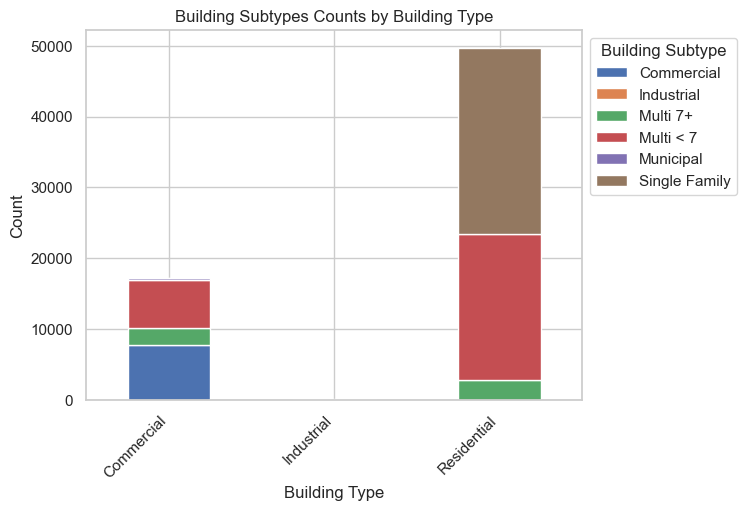

In [3353]:
building_type_subtypes = df.groupby('BUILDING TYPE')['BUILDING_SUBTYPE'].value_counts().unstack()

plt.figure(figsize=(14, 8))
building_type_subtypes.plot(kind='bar', stacked=True)
plt.title('Building Subtypes Counts by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Building Subtype', bbox_to_anchor=(1, 1))
plt.show()

In [3354]:
columns_to_remove = ['THERM JANUARY 2010', 'THERM FEBRUARY 2010', 'THERM MARCH 2010', 
                     'TERM APRIL 2010', 'THERM MAY 2010', 'THERM JUNE 2010', 
                     'THERM JULY 2010', 'THERM AUGUST 2010', 'THERM SEPTEMBER 2010', 
                     'THERM OCTOBER 2010', 'THERM NOVEMBER 2010', 'THERM DECEMBER 2010', 
                     'TOTAL THERMS', 'GAS ACCOUNTS', 'KWH TOTAL SQFT', 'THERMS TOTAL SQFT',
                     'KWH STANDARD DEVIATION 2010','KWH SQFT STANDARD DEVIATION 2010', 
                     'KWH SQFT MINIMUM 2010', 'KWH SQFT 1ST QUARTILE 2010', 'KWH SQFT 2ND QUARTILE 2010', 
                     'KWH SQFT 3RD QUARTILE 2010', 'KWH SQFT MAXIMUM 2010', 'THERM MEAN 2010', 
                     'THERM STANDARD DEVIATION 2010', 'THERM MINIMUM 2010', 'THERM 1ST QUARTILE 2010', 
                     'THERM 2ND QUARTILE 2010', 'THERM 3RD QUARTILE 2010', 'THERM MAXIMUM 2010', 
                     'THERMS SQFT MEAN 2010', 'THERMS SQFT STANDARD DEVIATION 2010', 'THERMS SQFT MINIMUM 2010', 
                     'THERMS SQFT 1ST QUARTILE 2010', 'THERMS SQFT 2ND QUARTILE 2010', 
                     'THERMS SQFT 3RD QUARTILE 2010', 'THERMS SQFT MAXIMUM 2010']

df.drop(columns=columns_to_remove, inplace=True)


In [3355]:
df.columns

Index(['COMMUNITY AREA NAME', 'CENSUS BLOCK', 'BUILDING TYPE',
       'BUILDING_SUBTYPE', 'KWH JANUARY 2010', 'KWH FEBRUARY 2010',
       'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010',
       'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010',
       'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010',
       'TOTAL KWH', 'ELECTRICITY ACCOUNTS', 'ZERO KWH ACCOUNTS',
       'KWH MEAN 2010', 'KWH MINIMUM 2010', 'KWH 1ST QUARTILE 2010',
       'KWH 2ND QUARTILE 2010', 'KWH 3RD QUARTILE 2010', 'KWH MAXIMUM 2010',
       'KWH SQFT MEAN 2010', 'TOTAL POPULATION', 'TOTAL UNITS',
       'AVERAGE STORIES', 'AVERAGE BUILDING AGE', 'AVERAGE HOUSESIZE',
       'OCCUPIED UNITS', 'OCCUPIED UNITS PERCENTAGE',
       'RENTER-OCCUPIED HOUSING UNITS', 'RENTER-OCCUPIED HOUSING PERCENTAGE',
       'OCCUPIED HOUSING UNITS'],
      dtype='object')

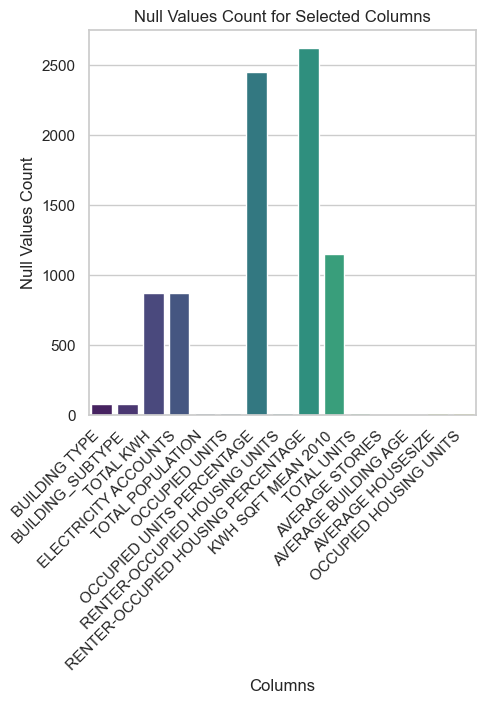

In [3356]:
columns_to_remove_nulls = ['BUILDING TYPE', 'BUILDING_SUBTYPE', 'TOTAL KWH', 'ELECTRICITY ACCOUNTS',
                    'TOTAL POPULATION', 'OCCUPIED UNITS', 'OCCUPIED UNITS PERCENTAGE','RENTER-OCCUPIED HOUSING UNITS', 
                           'RENTER-OCCUPIED HOUSING PERCENTAGE',
       'KWH SQFT MEAN 2010', 'TOTAL POPULATION', 'TOTAL UNITS',
       'AVERAGE STORIES', 'AVERAGE BUILDING AGE', 'AVERAGE HOUSESIZE',
       'OCCUPIED HOUSING UNITS']

null_counts = df[columns_to_remove_nulls].isnull().sum()

plt.figure(figsize=(5, 5))
sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')
plt.title('Null Values Count for Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Null Values Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [3357]:
categories_to_remove = ['Industrial', 'Commercial']
categories_to_remove_Building_subtype = ['Multi 7+', 'Industrial']

In [3358]:
categories_to_remove = ['Industrial', 'Commercial']
categories_to_remove_Building_subtype = ['Multi 7+', 'Industrial']

# 'BUILDING TYPE' sütunundaki belirli kategorileri kaldırma
df = df[~df['BUILDING TYPE'].isin(categories_to_remove)]

# 'BUILDING_SUBTYPE' sütunundaki belirli kategorileri kaldırma
df = df[~df['BUILDING_SUBTYPE'].isin(categories_to_remove_Building_subtype)]

# 'BUILDING_SUBTYPE' sütunundaki belirli kategorileri kaldırma
df = df[~df['BUILDING_SUBTYPE'].isin(categories_to_remove)]

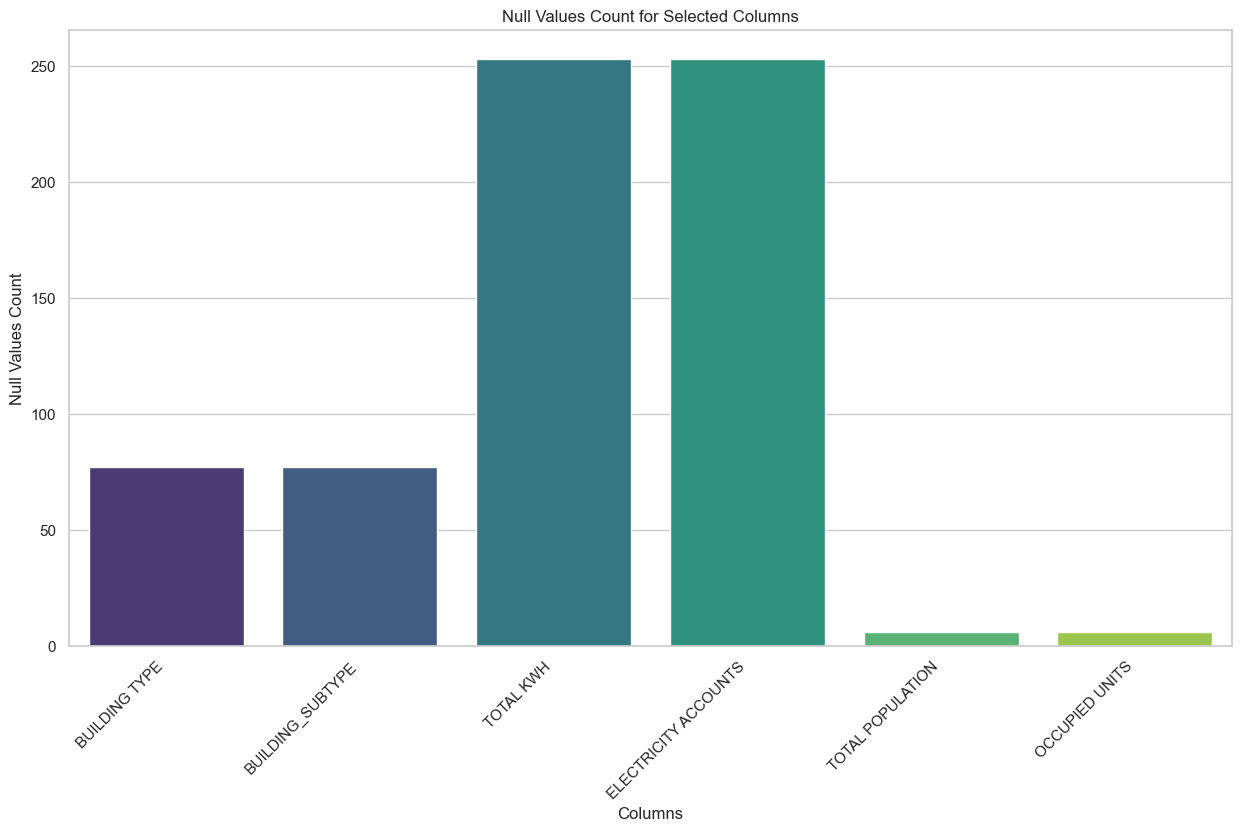

In [3359]:
columns_to_remove_nulls = ['BUILDING TYPE', 'BUILDING_SUBTYPE', 'TOTAL KWH', 'ELECTRICITY ACCOUNTS',
    'TOTAL POPULATION', 'OCCUPIED UNITS']

null_counts = df[columns_to_remove_nulls].isnull().sum()

plt.figure(figsize=(15, 8))
sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')
plt.title('Null Values Count for Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Null Values Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [3360]:
df.dropna(inplace= True)
df.isnull().sum()


COMMUNITY AREA NAME                   0
CENSUS BLOCK                          0
BUILDING TYPE                         0
BUILDING_SUBTYPE                      0
KWH JANUARY 2010                      0
KWH FEBRUARY 2010                     0
KWH MARCH 2010                        0
KWH APRIL 2010                        0
KWH MAY 2010                          0
KWH JUNE 2010                         0
KWH JULY 2010                         0
KWH AUGUST 2010                       0
KWH SEPTEMBER 2010                    0
KWH OCTOBER 2010                      0
KWH NOVEMBER 2010                     0
KWH DECEMBER 2010                     0
TOTAL KWH                             0
ELECTRICITY ACCOUNTS                  0
ZERO KWH ACCOUNTS                     0
KWH MEAN 2010                         0
KWH MINIMUM 2010                      0
KWH 1ST QUARTILE 2010                 0
KWH 2ND QUARTILE 2010                 0
KWH 3RD QUARTILE 2010                 0
KWH MAXIMUM 2010                      0


In [3361]:
df


,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
30,Chatham,1.703144e+14,Residential,Multi < 7,0.0,0.0,115.0,695.0,3527.0,8412.0,...,2.0,10.0,1.00,0.00,1.00,2.0,0.2000,1.0,0.5000,2.0
40,Clearing,1.703164e+14,Residential,Multi < 7,4632.0,3358.0,1884.0,1770.0,1416.0,1863.0,...,114.0,76.0,3.00,39.00,1.65,69.0,0.9079,50.0,0.7250,69.0
59,Englewood,1.703168e+14,Residential,Single Family,0.0,0.0,8.0,2.0,2.0,2.0,...,95.0,36.0,2.00,97.00,3.65,26.0,0.7222,23.0,0.8850,26.0
76,Hermosa,1.703120e+14,Residential,Multi < 7,1774.0,757.0,711.0,1199.0,1251.0,1950.0,...,18.0,9.0,2.00,130.00,2.25,8.0,0.8889,8.0,1.0000,8.0
86,Humboldt Park,1.703184e+14,Residential,Multi < 7,0.0,0.0,0.0,0.0,0.0,0.0,...,63.0,15.0,2.00,111.00,4.20,15.0,1.0000,2.0,0.1330,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67043,Woodlawn,1.703184e+14,Residential,Multi < 7,653.0,989.0,1281.0,1110.0,2077.0,2265.0,...,50.0,20.0,2.50,115.25,2.33,18.0,0.9000,13.0,0.7220,18.0
67045,Woodlawn,1.703184e+14,Residential,Multi < 7,9572.0,9104.0,8525.0,7756.0,11256.0,11669.0,...,116.0,55.0,2.00,51.90,3.14,37.0,0.6727,26.0,0.7030,37.0
67046,Woodlawn,1.703184e+14,Residential,Single Family,2705.0,1318.0,1582.0,1465.0,1494.0,2990.0,...,116.0,55.0,1.00,0.00,3.14,37.0,0.6727,26.0,0.7030,37.0
67048,Woodlawn,1.703184e+14,Residential,Multi < 7,3567.0,3031.0,2582.0,2295.0,7902.0,4987.0,...,31.0,24.0,2.33,100.67,2.07,15.0,0.6250,13.0,0.8670,15.0


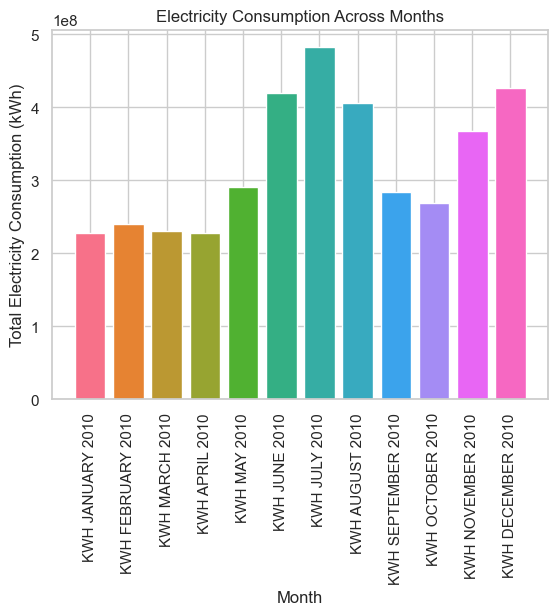

In [3362]:
monthly_kwh_columns = ['KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010']

monthly_consumption = df[monthly_kwh_columns].sum()


sns.set(style="whitegrid")  
palette = sns.color_palette("husl", len(monthly_consumption))

plt.bar(monthly_consumption.index, monthly_consumption.values, color=palette)
plt.xlabel('Month')
plt.ylabel('Total Electricity Consumption (kWh)')
plt.title('Electricity Consumption Across Months')
plt.xticks(rotation=90)
plt.show()

In [3363]:
df["COMMUNITY AREA NAME"].value_counts()

COMMUNITY AREA NAME
Austin             1842
West Town          1559
Logan Square       1516
Belmont Cragin     1411
Portage Park       1321
                   ... 
O'Hare               64
Oakland              59
Riverdale            32
Near South Side      26
Loop                  1
Name: count, Length: 77, dtype: int64

In [3364]:
# top 10 community areas with the highest total kWh
top_10_areas = df.groupby('COMMUNITY AREA NAME')['TOTAL KWH'].mean().nlargest(10) # removed sum and kept mean

print("Top 10 Community Areas with Highest Total kWh:")
print(top_10_areas)

Top 10 Community Areas with Highest Total kWh:
COMMUNITY AREA NAME
Near South Side    304733.846154
O'Hare             201188.140625
Mount Greenwood    178266.220820
Near North Side    164574.668790
Riverdale          145509.687500
Beverly            138033.251073
Forest Glen        137213.009302
Lincoln Park       133342.319407
Ashburn            132149.575233
Kenwood            126586.490741
Name: TOTAL KWH, dtype: float64


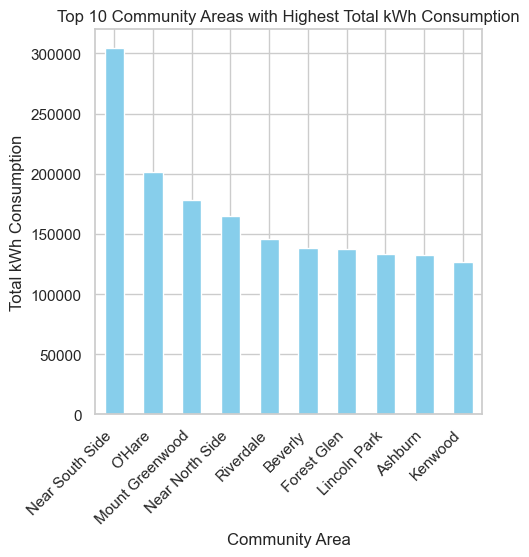

In [3365]:

# Plotting the top 10 community areas with the highest mean total kWh
plt.figure(figsize=(5, 5))
top_10_areas.plot(kind='bar', color='skyblue')
plt.title('Top 10 Community Areas with Highest Total kWh Consumption')
plt.xlabel('Community Area')
plt.ylabel('Total kWh Consumption')
plt.xticks(rotation=45, ha='right')
plt.show()

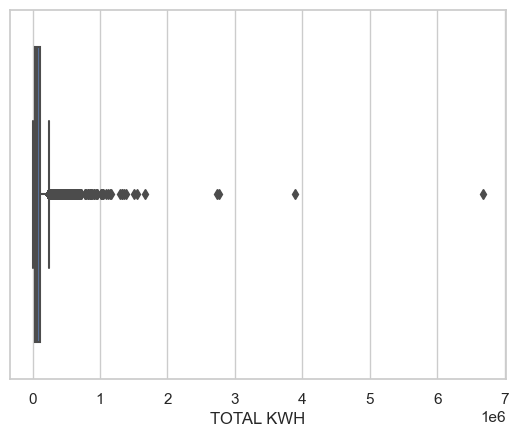

In [3366]:
sns.boxplot(x=df['TOTAL KWH'])

plt.show()

In [3367]:
# Kategorik sütunları seç
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# One-Hot Encoding işlemi
df = pd.get_dummies(df, columns=categorical_columns)

# Sonuçları görüntüle
print(df)



       CENSUS BLOCK  KWH JANUARY 2010  KWH FEBRUARY 2010  KWH MARCH 2010  \
30     1.703144e+14               0.0                0.0           115.0   
40     1.703164e+14            4632.0             3358.0          1884.0   
59     1.703168e+14               0.0                0.0             8.0   
76     1.703120e+14            1774.0              757.0           711.0   
86     1.703184e+14               0.0                0.0             0.0   
...             ...               ...                ...             ...   
67043  1.703184e+14             653.0              989.0          1281.0   
67045  1.703184e+14            9572.0             9104.0          8525.0   
67046  1.703184e+14            2705.0             1318.0          1582.0   
67048  1.703184e+14            3567.0             3031.0          2582.0   
67050  1.703184e+14            2717.0             3057.0          2695.0   

       KWH APRIL 2010  KWH MAY 2010  KWH JUNE 2010  KWH JULY 2010  \
30              69

In [3368]:
print(df.dtypes)
object_columns = df.select_dtypes(include=['object']).columns
if len(object_columns) > 0:
    print("Kategorik veri içeren sütunlar:", object_columns)
else:
    print("Kategorik veri içeren sütun bulunmuyor.")

CENSUS BLOCK                        float64
KWH JANUARY 2010                    float64
KWH FEBRUARY 2010                   float64
KWH MARCH 2010                      float64
KWH APRIL 2010                      float64
                                     ...   
ELECTRICITY ACCOUNTS_92                bool
ELECTRICITY ACCOUNTS_94                bool
ELECTRICITY ACCOUNTS_96                bool
ELECTRICITY ACCOUNTS_97                bool
ELECTRICITY ACCOUNTS_Less than 4       bool
Length: 232, dtype: object
Kategorik veri içeren sütun bulunmuyor.


In [3369]:
# LOF algoritması ile aykırı değerlerin tespiti
lof = LocalOutlierFactor()
outliers = lof.fit_predict(df)
df["KWH JUNE 2010"]

30        8412.0
40        1863.0
59           2.0
76        1950.0
86           0.0
          ...   
67043     2265.0
67045    11669.0
67046     2990.0
67048     4987.0
67050     5383.0
Name: KWH JUNE 2010, Length: 45848, dtype: float64

In [3370]:
# Aykırı değerlerin indekslerini görüntüle

print("Aykırı Değerlerin İndeksleri:")
print("\n")
outliers[:100]

Aykırı Değerlerin İndeksleri:




array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1])

In [3371]:
# Tüm sütunları döngüye almadan önce numerik sütunları seçelim
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Her bir sütun için aykırı değerleri düzeltme işlemini gerçekleştirelim

for col in numeric_columns:
    q75, q25 = np.percentile(df[col], [75, 25])
    intr_qr = q75 - q25

    max_val = q75 + (1.5 * intr_qr)
    min_val = q25 - (1.5 * intr_qr)

    df[col] = df[col].apply(lambda x: np.nan if x < min_val or x > max_val else x)

In [3372]:
print("\n\nOutlier sayısı:\n\n", df.isnull().sum())
         



Outlier sayısı:

 CENSUS BLOCK                           0
KWH JANUARY 2010                    1386
KWH FEBRUARY 2010                   1288
KWH MARCH 2010                      1301
KWH APRIL 2010                      1299
                                    ... 
ELECTRICITY ACCOUNTS_92                0
ELECTRICITY ACCOUNTS_94                0
ELECTRICITY ACCOUNTS_96                0
ELECTRICITY ACCOUNTS_97                0
ELECTRICITY ACCOUNTS_Less than 4       0
Length: 232, dtype: int64


In [3373]:
# Her bir sütunun ortalamasını hesaplayarak nan değerleri doldurma
for col in numeric_columns:
    mean_val = df[col].mean()
    df[col].fillna(mean_val, inplace=True)


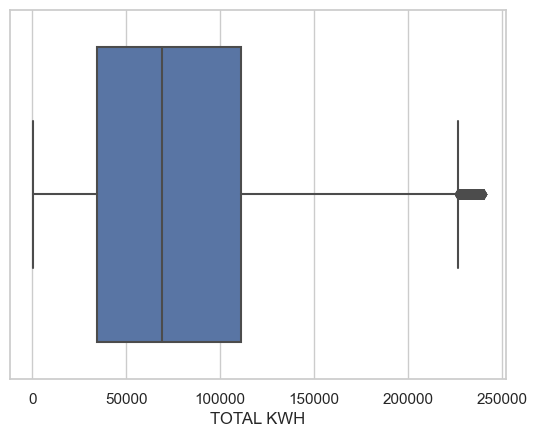

In [3374]:
sns.boxplot(x=df['TOTAL KWH'])

plt.show()

In [3375]:
# Aylara göre toplam elektrik harcamasını bulma
ocak_harcama = df['KWH JANUARY 2010'].sum()
subat_harcama = df['KWH FEBRUARY 2010'].sum()
mart_harcama = df['KWH MARCH 2010'].sum()
nisan_harcama = df['KWH APRIL 2010'].sum()
mayis_harcama = df['KWH MAY 2010'].sum()
haziran_harcama = df['KWH JUNE 2010'].sum()
temmuz_harcama = df['KWH JULY 2010'].sum()
agustos_harcama = df['KWH AUGUST 2010'].sum()
eylul_harcama = df['KWH SEPTEMBER 2010'].sum()
ekim_harcama = df['KWH OCTOBER 2010'].sum()
kasim_harcama = df['KWH NOVEMBER 2010'].sum()
aralik_harcama = df['KWH DECEMBER 2010'].sum()

# Toplam elektrik harcamasını bulma
toplam_harcama = ocak_harcama + subat_harcama + mart_harcama + nisan_harcama + mayis_harcama + haziran_harcama + temmuz_harcama + agustos_harcama + eylul_harcama + ekim_harcama + kasim_harcama + aralik_harcama

print("Ocak ayı elektrik harcaması:", ocak_harcama)
print("Şubat ayı elektrik harcaması:", subat_harcama)
print("Mart ayı elektrik harcaması:", mart_harcama)
print("Nisan ayı elektrik harcaması:", nisan_harcama)
print("Mayıs ayı elektrik harcaması:", mayis_harcama)
print("Haziran ayı elektrik harcaması:", haziran_harcama)
print("Temmuz ayı elektrik harcaması:", temmuz_harcama)
print("Ağustos ayı elektrik harcaması:", agustos_harcama)
print("Eylül ayı elektrik harcaması:", eylul_harcama)
print("Ekim ayı elektrik harcaması:", ekim_harcama)
print("Kasım ayı elektrik harcaması:", kasim_harcama)
print("Aralık ayı elektrik harcaması:", aralik_harcama)
print("Toplam elektrik harcaması:", toplam_harcama)


Ocak ayı elektrik harcaması: 202600177.47253835
Şubat ayı elektrik harcaması: 216631781.47971278
Mart ayı elektrik harcaması: 208041659.97297242
Nisan ayı elektrik harcaması: 205546598.7452917
Mayıs ayı elektrik harcaması: 259304923.7805839
Haziran ayı elektrik harcaması: 373665929.47228545
Temmuz ayı elektrik harcaması: 436259095.2016505
Ağustos ayı elektrik harcaması: 366156787.98480797
Eylül ayı elektrik harcaması: 253924842.12004694
Ekim ayı elektrik harcaması: 241638989.69646156
Kasım ayı elektrik harcaması: 333081955.5511626
Aralık ayı elektrik harcaması: 384472310.22411937
Toplam elektrik harcaması: 3481325051.701634


In [3376]:

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df)

df = pd.DataFrame(X_scaled, columns=df.columns)

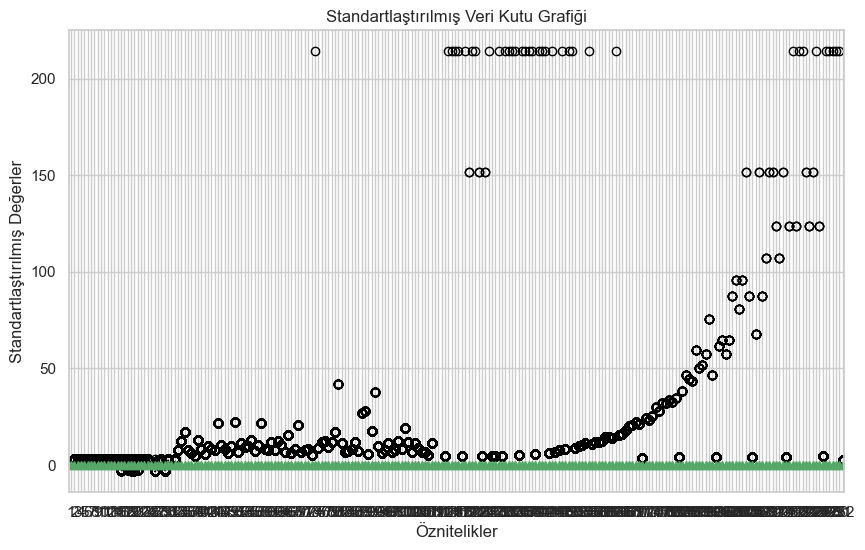

In [3377]:
plt.figure(figsize=(10, 6))
plt.boxplot(df, patch_artist=True, showmeans=True)
plt.xlabel('Öznitelikler')
plt.ylabel('Standartlaştırılmış Değerler')
plt.title('Standartlaştırılmış Veri Kutu Grafiği')
plt.grid(True)
plt.show()

In [3378]:
# Aylık tüketimleri toplamak için sütunları seçme
aylik_tuketimler = df.loc[:, 'KWH JANUARY 2010':'KWH DECEMBER 2010']

# Her bir satırın toplamını alarak aylık toplam tüketimi bulma
df['Toplam_Aylık_Tuketim'] = aylik_tuketimler.sum(axis=1)

# 2010 yılına ait toplam elektrik tüketimini bulma
toplam_tuketim_2010 = df['Toplam_Aylık_Tuketim'].sum()

print("2010 yılına ait toplam elektrik tüketimi:", toplam_tuketim_2010)

2010 yılına ait toplam elektrik tüketimi: -6.002665031701326e-11


In [3379]:
def bak_korelasyon(df):
    # Korelasyon matrisini hesaplama
    correlation_matrix = df.corr()
    highest_correlations = correlation_matrix.unstack().sort_values(ascending=False)
    highest_correlations = highest_correlations[(highest_correlations > 0) & (highest_correlations < 1)]
    print("En Yüksek Korelasyonlar:")
    print(highest_correlations)

    # Korelasyon matrisini görüntüleme
    print("\nKorelasyon Matrisi:")
    print(correlation_matrix, "\n\n")
    correlation_matrix['TOTAL KWH'].sort_values(ascending=False)
bak_korelasyon(df)
print(df)



En Yüksek Korelasyonlar:
Toplam_Aylık_Tuketim      TOTAL KWH                   9.742701e-01
TOTAL KWH                 Toplam_Aylık_Tuketim        9.742701e-01
Toplam_Aylık_Tuketim      KWH APRIL 2010              9.267838e-01
KWH APRIL 2010            Toplam_Aylık_Tuketim        9.267838e-01
OCCUPIED HOUSING UNITS    TOTAL UNITS                 9.240902e-01
                                                          ...     
ELECTRICITY ACCOUNTS_108  KWH MAXIMUM 2010            2.101981e-21
ELECTRICITY ACCOUNTS_115  KWH MAXIMUM 2010            1.732357e-21
KWH MAXIMUM 2010          ELECTRICITY ACCOUNTS_115    1.732357e-21
ELECTRICITY ACCOUNTS_83   KWH MARCH 2010              1.658869e-21
KWH MARCH 2010            ELECTRICITY ACCOUNTS_83     1.658869e-21
Length: 12516, dtype: float64

Korelasyon Matrisi:
                                  CENSUS BLOCK  KWH JANUARY 2010  \
CENSUS BLOCK                          1.000000     -3.365196e-02   
KWH JANUARY 2010                     -0.033652     

In [3380]:
df.columns

Index(['CENSUS BLOCK', 'KWH JANUARY 2010', 'KWH FEBRUARY 2010',
       'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010',
       'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010',
       ...
       'ELECTRICITY ACCOUNTS_88', 'ELECTRICITY ACCOUNTS_89',
       'ELECTRICITY ACCOUNTS_9', 'ELECTRICITY ACCOUNTS_91',
       'ELECTRICITY ACCOUNTS_92', 'ELECTRICITY ACCOUNTS_94',
       'ELECTRICITY ACCOUNTS_96', 'ELECTRICITY ACCOUNTS_97',
       'ELECTRICITY ACCOUNTS_Less than 4', 'Toplam_Aylık_Tuketim'],
      dtype='object', length=233)

In [3381]:
X = df.drop(['TOTAL KWH'], axis=1)
y = df[['TOTAL KWH']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3382]:
# Doğrusal regresyon modelini oluşturma
linear_reg = LinearRegression()

# Modeli eğitme
linear_reg.fit(X_train, y_train)

# Eğitim veri seti üzerinde tahmin yapma
train_predictions = linear_reg.predict(X_train)

# Test veri seti üzerinde tahmin yapma
test_predictions = linear_reg.predict(X_test)

# Eğitim seti için tahmin yapma
train_predictions = linear_reg.predict(X_train)

# Test seti için tahmin yapma
test_predictions = linear_reg.predict(X_test)

# Eğitim seti için MAE hesaplama
train_mae = mean_absolute_error(y_train, train_predictions)

# Test seti için MAE hesaplama
test_mae = mean_absolute_error(y_test, test_predictions)

# Eğitim seti için MSE hesaplama
train_mse = mean_squared_error(y_train, train_predictions)

# Test seti için MSE hesaplama
test_mse = mean_squared_error(y_test, test_predictions)

# Eğitim seti için R-kare hesaplama
train_r2 = r2_score(y_train, train_predictions)

# Test seti için R-kare hesaplama
test_r2 = r2_score(y_test, test_predictions)

# Sonuçları DataFrame'e dönüştürme
results = pd.DataFrame({
    'Veri Seti': ['Eğitim', 'Test'],
    'MAE': [train_mae, test_mae],
    'MSE': [train_mse, test_mse],
    'R-squared': [train_r2, test_r2]
})

# Tabloyu düzenleme
results



,Veri Seti,MAE,MSE,R-squared
0,Eğitim,7.700095e-02,4.642830e-02,9.533040e-01
1,Test,3.216697e+09,3.172395e+22,-3.120021e+22


In [3383]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Karar ağacı regresyon modeli oluşturma
decision_tree = DecisionTreeRegressor(random_state=42)

# Modeli eğitme
decision_tree.fit(X_train, y_train)

# Eğitim ve test seti üzerinde tahmin yapma
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# R-kare değerlerini hesaplama
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# MAE ve MSE değerlerini hesaplama
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Sonuçları DataFrame'e dönüştürme
results = pd.DataFrame({
    'Veri Seti': ['Eğitim', 'Test'],
    'R-squared': [train_r2, test_r2],
    'MAE': [train_mae, test_mae],
    'MSE': [train_mse, test_mse]
})

results


,Veri Seti,R-squared,MAE,MSE
0,Eğitim,1.000000,0.000000,0.000000
1,Test,0.932778,0.059223,0.068351


In [3384]:
base_regressor = DecisionTreeRegressor()

multioutput_regressor_dt = MultiOutputRegressor(base_regressor)

multioutput_regressor_dt.fit(X_train, y_train)

y_test_pred_dt = multioutput_regressor_dt.predict(X_test)
y_train_pred_dt = multioutput_regressor_dt.predict(X_train)

#KWH
r2_train_kwh_dt = r2_score(y_train['TOTAL KWH'], y_train_pred_dt[:, 0])
mae_train_kwh_dt = mean_absolute_error(y_train['TOTAL KWH'], y_train_pred_dt[:, 0])
mse_train_kwh_dt = mean_squared_error(y_train['TOTAL KWH'], y_train_pred_dt[:, 0])

r2_test_kwh_dt = r2_score(y_test['TOTAL KWH'], y_test_pred_dt[:, 0])
mae_test_kwh_dt = mean_absolute_error(y_test['TOTAL KWH'], y_test_pred_dt[:, 0])
mse_test_kwh_dt = mean_squared_error(y_test['TOTAL KWH'], y_test_pred_dt[:, 0])

results_dt = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'KWH Train Set': [r2_train_kwh_dt, mae_train_kwh_dt, mse_train_kwh_dt], 
    'KWH Test Set': [r2_test_kwh_dt, mae_test_kwh_dt, mse_test_kwh_dt], 
})

results_dt = results_dt.round(4)
results_dt

,Metric,KWH Train Set,KWH Test Set
0,R-squared,1.0,0.9331
1,MAE,0.0,0.0592
2,MSE,0.0,0.0680


In [3385]:
# Özellik adlarında özel karakterleri kaldırın veya değiştirin
X_train.columns = [col.replace("[", "").replace("]", "").replace("<", "") for col in X_train.columns]
X_test.columns = [col.replace("[", "").replace("]", "").replace("<", "") for col in X_test.columns]


# XGBoost Regressor modelini oluşturma
xgboost_model = XGBRegressor()

# Modeli eğitme
xgboost_model.fit(X_train, y_train)

# Eğitim ve test verileri üzerinde tahmin yapma
y_train_pred = xgboost_model.predict(X_train)
y_test_pred = xgboost_model.predict(X_test)

# Eğitim ve test setleri için performans metriklerini hesaplama
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
import pandas as pd

# Performans metriklerini bir sözlükte toplama
results = {
    'Veri Seti': ['Eğitim', 'Test'],
    'MAE': [train_mae, test_mae],
    'MSE': [train_mse, test_mse],
    'R^2': [train_r2, test_r2]
}

# DataFrame oluşturma
results_df = pd.DataFrame(results)

# Sonuçları yazdırma
results_df


,Veri Seti,MAE,MSE,R^2
0,Eğitim,0.019170,0.001542,0.998449
1,Test,0.047594,0.036996,0.963615


In [3386]:

# Modeli oluşturma
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Modeli eğitme
gradient_boosting_regressor.fit(X_train, y_train)

# Eğitim seti üzerinde tahmin yapma
y_train_pred_gb = gradient_boosting_regressor.predict(X_train)

# Test seti üzerinde tahmin yapma
y_test_pred_gb = gradient_boosting_regressor.predict(X_test)

# Eğitim seti performansı
train_mse_gb = mean_squared_error(y_train, y_train_pred_gb)
train_mae_gb = mean_absolute_error(y_train, y_train_pred_gb)
train_r2_gb = r2_score(y_train, y_train_pred_gb)

# Test seti performansı
test_mse_gb = mean_squared_error(y_test, y_test_pred_gb)
test_mae_gb = mean_absolute_error(y_test, y_test_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)

# Performans metriklerini dataframe'e dönüştürme
results_gb = pd.DataFrame({
    'Set': ['GB Eğitim', 'GB Test'],
    'MSE': [train_mse_gb, test_mse_gb],
    'MAE': [train_mae_gb, test_mae_gb],
    'R^2': [train_r2_gb, test_r2_gb]
})

# Sonuçları yazdırma
print(results_gb)



/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


         Set       MSE       MAE       R^2
0  GB Eğitim  0.031047  0.057132  0.968774
1    GB Test  0.042348  0.064295  0.958351


In [3387]:

# Özellik adlarını kontrol edin
print(X_train.columns)

# Özellik adlarında özel karakterleri kaldırın veya değiştirin
X_train.columns = [col.replace("[", "").replace("]", "").replace("<", "") for col in X_train.columns]
X_test.columns = [col.replace("[", "").replace("]", "").replace("<", "") for col in X_test.columns]

# XGBoost veri yapısına dönüştürme
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Model parametrelerinin belirlenmesi
params = {
    'objective': 'reg:squarederror',  # Regresyon amaçlı
    'max_depth': 3,  # Ağaç derinliği
    'learning_rate': 0.1,  # Öğrenme oranı
    'n_estimators': 100  # Ağaç sayısı
}

# Modelin eğitilmesi
xg_reg = xgb.train(params, dtrain)

# Eğitim ve test seti üzerinde tahmin yapma
y_train_pred = xg_reg.predict(dtrain)
y_test_pred = xg_reg.predict(dtest)

# MSE değerlerini hesaplama
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Eğitim seti MSE:", train_mse)
print("Test seti MSE:", test_mse)


Index(['CENSUS BLOCK', 'KWH JANUARY 2010', 'KWH FEBRUARY 2010',
       'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010',
       'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010',
       ...
       'ELECTRICITY ACCOUNTS_88', 'ELECTRICITY ACCOUNTS_89',
       'ELECTRICITY ACCOUNTS_9', 'ELECTRICITY ACCOUNTS_91',
       'ELECTRICITY ACCOUNTS_92', 'ELECTRICITY ACCOUNTS_94',
       'ELECTRICITY ACCOUNTS_96', 'ELECTRICITY ACCOUNTS_97',
       'ELECTRICITY ACCOUNTS_Less than 4', 'Toplam_Aylık_Tuketim'],
      dtype='object', length=232)
Eğitim seti MSE: 0.1683991549616329
Test seti MSE: 0.17485902877090306


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [01:11:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [3388]:

# Örnek veri oluşturma
np.random.seed(0)
dates = pd.date_range(start='2011-01-01', end='2011-12-31', freq='D')
df = pd.DataFrame({'Date': dates,
                   'TOTAL KWH': np.random.randint(100, 1000, len(dates))})

# Ay sütunu ekleme
df['Month'] = df['Date'].dt.month

# Ay bazında tahminler için boş bir DataFrame oluşturma
predictions_df = pd.DataFrame(columns=['Month', 'Predicted_KWH'])

# Her ay için model oluşturma ve tahmin yapma
for month in range(1, 13):
    # Belirli ay için veri setini seçme
    X_month = df[df['Month'] == month][['Month']]
    y_month = df[df['Month'] == month]['TOTAL KWH']
    
    # Veri setini eğitim ve test olarak ayırma
    X_train, X_test, y_train, y_test = train_test_split(X_month, y_month, test_size=0.25, random_state=42)
    
    # XGBoost veri yapısına dönüştürme
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test)
    
    # Model parametrelerinin belirlenmesi
    params = {
        'objective': 'reg:squarederror',  # Regresyon amaçlı
        'max_depth': 3,  # Ağaç derinliği
        'learning_rate': 0.1,  # Öğrenme oranı
        'n_estimators': 100  # Ağaç sayısı
    }
    
    # Modelin eğitilmesi
    xg_reg = xgb.train(params, dtrain)
    
    # Tahmin yapma
    predictions = xg_reg.predict(dtest)
    
    # Ay bazında tahminleri DataFrame'e ekleme
    month_predictions = pd.DataFrame({'Month': [month] * len(predictions), 'Predicted_KWH': predictions})
    predictions_df = pd.concat([predictions_df, month_predictions], ignore_index=True)

# Sonuçları gösterme
print(predictions_df)


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [01:11:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/var/folders/0y/nkm3n3y10wn7lvxl5cw08c780000gn/T/ipykernel_5296/1762416829.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions_df = pd.concat([predictions_df, month_predictions], ignore_index=True)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [01:11:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: User

   Month  Predicted_KWH
0      1     670.565247
1      1     670.565247
2      1     670.565247
3      1     670.565247
4      1     670.565247
..   ...            ...
90    12     535.173889
91    12     535.173889
92    12     535.173889
93    12     535.173889
94    12     535.173889

[95 rows x 2 columns]


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [01:11:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [01:11:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [3389]:

# Örnek veri oluşturma
np.random.seed(0)
dates = pd.date_range(start='2011-01-01', end='2011-12-31', freq='D')
df = pd.DataFrame({'Date': dates,
                   'TOTAL KWH': np.random.randint(100, 1000, len(dates))})

# Ay sütunu ekleme
df['Month'] = df['Date'].dt.month

# Ay bazında tahminler için boş bir DataFrame oluşturma
predictions_df = pd.DataFrame(columns=['Month', 'Predicted_KWH'])

# Her ay için model oluşturma ve tahmin yapma
for month in range(1, 13):
    # Belirli ay için veri setini seçme
    X_month = df[df['Month'] == month][['Month']]
    y_month = df[df['Month'] == month]['TOTAL KWH']
    
    # Veri setini eğitim ve test olarak ayırma
    X_train, X_test, y_train, y_test = train_test_split(X_month, y_month, test_size=0.25, random_state=42)
    
    # XGBoost veri yapısına dönüştürme
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test)
    
    # Model parametrelerinin belirlenmesi
    params = {
        'objective': 'reg:squarederror',  # Regresyon amaçlı
        'max_depth': 3,  # Ağaç derinliği
        'learning_rate': 0.1,  # Öğrenme oranı
        'n_estimators': 100  # Ağaç sayısı
    }
    
    # Modelin eğitilmesi
    xg_reg = xgb.train(params, dtrain)
    
    # Ay bazında tahmin yapma
    month_predictions = xg_reg.predict(dtest)
    
    # Tahmin edilen değerlerin ters standartlaştırılması
    month_predictions_inverse = month_predictions.reshape(-1, 1) * df['TOTAL KWH'].std() + df['TOTAL KWH'].mean()
    
    # Ay bazında tahminleri DataFrame'e ekleme
    month_predictions_df = pd.DataFrame({'Month': [month] * len(month_predictions_inverse), 'Predicted_KWH': month_predictions_inverse.flatten()})
    predictions_df = pd.concat([predictions_df, month_predictions_df], ignore_index=True)

# Sonuçları gösterme
print(predictions_df)


   Month  Predicted_KWH
0      1  182799.156250
1      1  182799.156250
2      1  182799.156250
3      1  182799.156250
4      1  182799.156250
..   ...            ...
90    12  146002.421875
91    12  146002.421875
92    12  146002.421875
93    12  146002.421875
94    12  146002.421875

[95 rows x 2 columns]


/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [01:11:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/var/folders/0y/nkm3n3y10wn7lvxl5cw08c780000gn/T/ipykernel_5296/2333694404.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions_df = pd.concat([predictions_df, month_predictions_df], ignore_index=True)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [01:11:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: U

In [3390]:
# Aylara göre toplam tahmini elektrik tüketimini bulma
ocak_harcama = predictions_df[predictions_df['Month'] == 1]['Predicted_KWH'].sum()
subat_harcama = predictions_df[predictions_df['Month'] == 2]['Predicted_KWH'].sum()
mart_harcama = predictions_df[predictions_df['Month'] == 3]['Predicted_KWH'].sum()
nisan_harcama = predictions_df[predictions_df['Month'] == 4]['Predicted_KWH'].sum()
mayis_harcama = predictions_df[predictions_df['Month'] == 5]['Predicted_KWH'].sum()
haziran_harcama = predictions_df[predictions_df['Month'] == 6]['Predicted_KWH'].sum()
temmuz_harcama = predictions_df[predictions_df['Month'] == 7]['Predicted_KWH'].sum()
agustos_harcama = predictions_df[predictions_df['Month'] == 8]['Predicted_KWH'].sum()
eylul_harcama = predictions_df[predictions_df['Month'] == 9]['Predicted_KWH'].sum()
ekim_harcama = predictions_df[predictions_df['Month'] == 10]['Predicted_KWH'].sum()
kasim_harcama = predictions_df[predictions_df['Month'] == 11]['Predicted_KWH'].sum()
aralik_harcama = predictions_df[predictions_df['Month'] == 12]['Predicted_KWH'].sum()

# Toplam tahmini elektrik tüketimini bulma
toplam_harcama = ocak_harcama + subat_harcama + mart_harcama + nisan_harcama + mayis_harcama + haziran_harcama + temmuz_harcama + agustos_harcama + eylul_harcama + ekim_harcama + kasim_harcama + aralik_harcama

# Sonuçları gösterme
print("Ocak ayı elektrik harcaması:", ocak_harcama)
print("Şubat ayı elektrik harcaması:", subat_harcama)
print("Mart ayı elektrik harcaması:", mart_harcama)
print("Nisan ayı elektrik harcaması:", nisan_harcama)
print("Mayıs ayı elektrik harcaması:", mayis_harcama)
print("Haziran ayı elektrik harcaması:", haziran_harcama)
print("Temmuz ayı elektrik harcaması:", temmuz_harcama)
print("Ağustos ayı elektrik harcaması:", agustos_harcama)
print("Eylül ayı elektrik harcaması:", eylul_harcama)
print("Ekim ayı elektrik harcaması:", ekim_harcama)
print("Kasım ayı elektrik harcaması:", kasim_harcama)
print("Aralık ayı elektrik harcaması:", aralik_harcama)
print("Toplam elektrik harcaması:", toplam_harcama)


Ocak ayı elektrik harcaması: 1462393.2
Şubat ayı elektrik harcaması: 1233222.1
Mart ayı elektrik harcaması: 1126425.2
Nisan ayı elektrik harcaması: 1189878.0
Mayıs ayı elektrik harcaması: 1138147.2
Haziran ayı elektrik harcaması: 1066637.9
Temmuz ayı elektrik harcaması: 1356044.2
Ağustos ayı elektrik harcaması: 1256312.6
Eylül ayı elektrik harcaması: 1256390.0
Ekim ayı elektrik harcaması: 1368428.0
Kasım ayı elektrik harcaması: 1073654.8
Aralık ayı elektrik harcaması: 1168019.4
Toplam elektrik harcaması: 14695553.0


In [3391]:

# Eğitim ve test seti üzerinde tahmin yapma
# "TOTAL KWH" sütununu çıkararak X veri setini oluşturma
X = df.drop(['TOTAL KWH'], axis=1)

y_train_pred = xg_reg.predict(dtrain)
y_test_pred = xg_reg.predict(dtest)

# R-kare değerlerini hesaplama
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Eğitim seti R-squared:", train_r2)
print("Test seti R-squared:", test_r2)


Eğitim seti R-squared: -9.325873406851315e-15
Test seti R-squared: -0.0001323426469381772


In [3392]:
# X_train ve X_test'in ortalaması ve standart sapmasını bulma
X_mean = X_train.mean()
X_std = X_train.std()

# Tahmin edilen değerlerin ters standartlaştırılması
y_train_pred_inverse = y_train_pred.reshape(-1, 1) * X_std.values + X_mean.values
y_test_pred_inverse = y_test_pred.reshape(-1, 1) * X_std.values + X_mean.values



In [3393]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have a univariate time series data for electricity consumption
# Fit ARIMA model
arima_model = ARIMA(y_train_pred, order=(5,1,0))  # You may need to adjust the order parameters
arima_result = arima_model.fit()

# Forecast next year
next_year_forecast = arima_result.forecast(steps=12)  # Forecasting 12 months ahead

# Print or use next_year_forecast as needed
print("ARIMA Forecast for Next Year:", next_year_forecast)

ARIMA Forecast for Next Year: [535.17388916 535.17388916 535.17388916 535.17388916 535.17388916
 535.17388916 535.17388916 535.17388916 535.17388916 535.17388916
 535.17388916 535.17388916]


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [3394]:
# Örnek girdi verilerini oluşturma
# Örnek bir veri seti oluşturmak için mevcut özelliklerin ortalama değerlerini kullanabiliriz
mean_values = X_train.mean()

# Yeni bir girdi veri seti oluşturma (örneğin, 2025 yılı için)
X_future = pd.DataFrame([mean_values], columns=X_train.columns)

# Girdi verilerini XGBoost veri yapısına dönüştürme
dfuture = xgb.DMatrix(X_future)

# Modeli kullanarak tahmin yapma
future_prediction = xg_reg.predict(dfuture)

print("1 yıl sonraki tahmini toplam elektrik tüketimi:", future_prediction[0])


1 yıl sonraki tahmini toplam elektrik tüketimi: 535.1739
